In [3]:
import pandas as pd

In [4]:
df_feature_x = pd.read_csv("job.csv", index_col=0)
df_feature_x.head(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
5,<35,No,Master,1,Man,No,Dev,9,2,France,38915.0,JavaScript;Python;Docker;Git;MySQL,5,0
6,>35,No,Master,1,Man,No,Dev,26,18,Germany,77831.0,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,<35,No,Master,1,Man,No,NotDev,14,5,Switzerland,81319.0,C++;Python;Docker;Git,4,0
8,>35,No,Undergraduate,1,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507.0,Python;Git;PostgreSQL,3,0
9,>35,No,Master,1,Man,No,Dev,20,16,Russian Federation,37752.0,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


In [5]:
df_feature_x["EdLevel"].replace({"NoHigherEd": 1, "Other": 2, "Undergraduate": 3, "Master": 4, "PhD": 5}, inplace=True)
df_feature_x.head(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,4,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,3,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,4,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,3,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,5,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
5,<35,No,4,1,Man,No,Dev,9,2,France,38915.0,JavaScript;Python;Docker;Git;MySQL,5,0
6,>35,No,4,1,Man,No,Dev,26,18,Germany,77831.0,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,<35,No,4,1,Man,No,NotDev,14,5,Switzerland,81319.0,C++;Python;Docker;Git,4,0
8,>35,No,3,1,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507.0,Python;Git;PostgreSQL,3,0
9,>35,No,4,1,Man,No,Dev,20,16,Russian Federation,37752.0,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


In [6]:
df_feature_x["Age"].replace({"<35": 0, ">35": 1}, inplace=True)
df_feature_x.head(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,No,4,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,0,No,3,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,0,No,4,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,0,No,3,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,1,No,5,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
5,0,No,4,1,Man,No,Dev,9,2,France,38915.0,JavaScript;Python;Docker;Git;MySQL,5,0
6,1,No,4,1,Man,No,Dev,26,18,Germany,77831.0,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,0,No,4,1,Man,No,NotDev,14,5,Switzerland,81319.0,C++;Python;Docker;Git,4,0
8,1,No,3,1,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507.0,Python;Git;PostgreSQL,3,0
9,1,No,4,1,Man,No,Dev,20,16,Russian Federation,37752.0,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


In [12]:
df_feature_x["Gender"].replace({"Man": 1, "Woman": 2, "NonBinary": 3}, inplace=True)
df_feature_x.head(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,No,4,1,1,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,0,No,3,1,1,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,0,No,4,1,1,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,0,No,3,1,1,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,1,No,5,0,1,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
5,0,No,4,1,1,No,Dev,9,2,France,38915.0,JavaScript;Python;Docker;Git;MySQL,5,0
6,1,No,4,1,1,No,Dev,26,18,Germany,77831.0,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,0,No,4,1,1,No,NotDev,14,5,Switzerland,81319.0,C++;Python;Docker;Git,4,0
8,1,No,3,1,1,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507.0,Python;Git;PostgreSQL,3,0
9,1,No,4,1,1,No,Dev,20,16,Russian Federation,37752.0,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


In [13]:
df_feature_x["Accessibility"].replace({"Yes": 1, "No": 0}, inplace=True)
df_feature_x.head(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,0,4,1,1,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,0,0,3,1,1,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,0,0,4,1,1,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,0,0,3,1,1,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,1,0,5,0,1,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
5,0,0,4,1,1,No,Dev,9,2,France,38915.0,JavaScript;Python;Docker;Git;MySQL,5,0
6,1,0,4,1,1,No,Dev,26,18,Germany,77831.0,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,0,0,4,1,1,No,NotDev,14,5,Switzerland,81319.0,C++;Python;Docker;Git,4,0
8,1,0,3,1,1,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507.0,Python;Git;PostgreSQL,3,0
9,1,0,4,1,1,No,Dev,20,16,Russian Federation,37752.0,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


In [14]:
df_feature_x["MentalHealth"].replace({"Yes": 1, "No": 0}, inplace=True)
df_feature_x.head(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,0,4,1,1,0,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,0,0,3,1,1,0,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,0,0,4,1,1,0,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,0,0,3,1,1,0,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,1,0,5,0,1,0,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
5,0,0,4,1,1,0,Dev,9,2,France,38915.0,JavaScript;Python;Docker;Git;MySQL,5,0
6,1,0,4,1,1,0,Dev,26,18,Germany,77831.0,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,0,0,4,1,1,0,NotDev,14,5,Switzerland,81319.0,C++;Python;Docker;Git,4,0
8,1,0,3,1,1,0,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507.0,Python;Git;PostgreSQL,3,0
9,1,0,4,1,1,0,Dev,20,16,Russian Federation,37752.0,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


In [15]:
df_feature_x["MainBranch"].replace({"Dev": 1, "NotDev": 2}, inplace=True)
df_feature_x.head(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,0,4,1,1,0,1,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,0,0,3,1,1,0,1,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,0,0,4,1,1,0,1,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,0,0,3,1,1,0,1,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,1,0,5,0,1,0,2,40,30,Singapore,160932.0,C++;Python,2,0
5,0,0,4,1,1,0,1,9,2,France,38915.0,JavaScript;Python;Docker;Git;MySQL,5,0
6,1,0,4,1,1,0,1,26,18,Germany,77831.0,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,0,0,4,1,1,0,2,14,5,Switzerland,81319.0,C++;Python;Docker;Git,4,0
8,1,0,3,1,1,0,1,39,21,United Kingdom of Great Britain and Northern I...,68507.0,Python;Git;PostgreSQL,3,0
9,1,0,4,1,1,0,1,20,16,Russian Federation,37752.0,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


In [25]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

years_exp = df_feature_x["YearsCode"].values.reshape(-1, 1)
years_pro_exp = df_feature_x["YearsCodePro"].values.reshape(-1, 1)
num_skills = df_feature_x["ComputerSkills"].values.reshape(-1, 1)
prev_salary = df_feature_x["PreviousSalary"].values.reshape(-1, 1)

data_to_normal = np.column_stack((years_exp, years_pro_exp, num_skills, prev_salary))

new_values = scaler.fit_transform(data_to_normal)

df_feature_x["YearsCode"] = new_values[:, 0]
df_feature_x["YearsCodePro"] = new_values[:, 1]
df_feature_x["ComputerSkills"] = new_values[:, 2]
df_feature_x["PreviousSalary"] = new_values[:, 3]

df_feature_x.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,0,4,1,1,0,1,-0.767551,-0.640488,Sweden,-0.327318,C++;Python;Git;PostgreSQL,-1.335861,0
1,0,0,3,1,1,0,1,-0.235925,-0.514862,Spain,-0.429768,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,-0.202361,1
2,0,0,4,1,1,0,1,0.083050,-0.389236,Germany,0.192769,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,-0.910798,0
3,0,0,3,1,1,0,1,-0.554901,-0.389236,Canada,-0.436780,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,-0.060674,0
4,1,0,5,0,1,0,2,2.741180,2.625783,Singapore,1.882923,C++;Python,-1.619236,0


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

years_exp = df_feature_x["YearsCode"].values.reshape(-1, 1)
years_pro_exp = df_feature_x["YearsCodePro"].values.reshape(-1, 1)
num_skills = df_feature_x["ComputerSkills"].values.reshape(-1, 1)
prev_salary = df_feature_x["PreviousSalary"].values.reshape(-1, 1)

data_to_minmax = np.column_stack((years_exp, years_pro_exp, num_skills, prev_salary))

new_values = scaler.fit_transform(data_to_normal)

df_feature_x["YearsCode"] = new_values[:, 0]
df_feature_x["YearsCodePro"] = new_values[:, 1]
df_feature_x["ComputerSkills"] = new_values[:, 2]
df_feature_x["PreviousSalary"] = new_values[:, 3]

df_feature_x.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,0,4,1,1,0,1,0.14,0.08,Sweden,0.230139,C++;Python;Git;PostgreSQL,0.037383,0
1,0,0,3,1,1,0,1,0.24,0.10,Spain,0.207505,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,0.112150,1
2,0,0,4,1,1,0,1,0.30,0.12,Germany,0.345042,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,0.065421,0
3,0,0,3,1,1,0,1,0.18,0.12,Canada,0.205956,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,0.121495,0
4,1,0,5,0,1,0,2,0.80,0.60,Singapore,0.718445,C++;Python,0.018692,0


In [28]:
col_to_use = ["Age", "Accessibility", "Gender", "MentalHealth", "MainBranch", "YearsCode", "YearsCodePro", "PreviousSalary", "ComputerSkills"]
new_df_x = df_feature_x[col_to_use]
new_df_x.head(10)

,Age,Accessibility,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills
0,0,0,1,0,1,0.14,0.08,0.230139,0.037383
1,0,0,1,0,1,0.24,0.10,0.207505,0.112150
2,0,0,1,0,1,0.30,0.12,0.345042,0.065421
3,0,0,1,0,1,0.18,0.12,0.205956,0.121495
4,1,0,1,0,2,0.80,0.60,0.718445,0.018692
5,0,0,1,0,1,0.18,0.04,0.173724,0.046729
6,1,0,1,0,1,0.52,0.36,0.347457,0.158879
7,0,0,1,0,2,0.28,0.10,0.363028,0.037383
8,1,0,1,0,1,0.78,0.42,0.305832,0.028037
9,1,0,1,0,1,0.40,0.32,0.168532,0.056075


In [29]:
new_df_y = df_feature_x["Employed"]
new_df_y.head(10)

0    0
1    1
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: Employed, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(new_df_x, new_df_y, test_size=0.2, random_state=1)


print(f"Data before splitting: {len(df_feature_x)}")
print(f"Train data: {len(X_train)}")
print(f"Validation data: {len(X_valid)}")

Data before splitting: 73462
Train data: 58769
Validation data: 14693


In [31]:
EPOCH = 20
LEARNING_RATE = 1e-3

In [33]:
import tensorflow as tf
len_feature = len(new_df_x.columns)

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len_feature,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, epochs=EPOCH, validation_data=(X_valid, Y_valid))

Epoch 1/20


2023-11-20 16:57:12.397582: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55c35444a240 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-20 16:57:12.397664: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-11-20 16:57:12.411207: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-20 16:57:12.462964: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-20 16:57:12.595619: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1837/1837 [==============================] - 13s 6ms/step - loss: 0.5351 - accuracy: 0.7193 - val_loss: 0.4610 - val_accuracy: 0.7705
Epoch 2/20
1837/1837 [==============================] - 11s 6ms/step - loss: 0.4509 - accuracy: 0.7808 - val_loss: 0.4492 - val_accuracy: 0.7775
Epoch 3/20
1837/1837 [==============================] - 11s 6ms/step - loss: 0.4490 - accuracy: 0.7811 - val_loss: 0.4596 - val_accuracy: 0.7676
Epoch 4/20
1837/1837 [==============================] - 12s 6ms/step - loss: 0.4488 - accuracy: 0.7817 - val_loss: 0.4487 - val_accuracy: 0.7807
Epoch 5/20
1837/1837 [==============================] - 12s 6ms/step - loss: 0.4493 - accuracy: 0.7815 - val_loss: 0.4484 - val_accuracy: 0.7844
Epoch 6/20
1837/1837 [==============================] - 12s 6ms/step - loss: 0.4483 - accuracy: 0.7828 - val_loss: 0.4491 - val_accuracy: 0.7793
Epoch 7/20
1837/1837 [==============================] - 11s 6ms/step - loss: 0.4480 - accuracy: 0.7814 - val_loss: 0.4489 - val_accuracy: 0.7

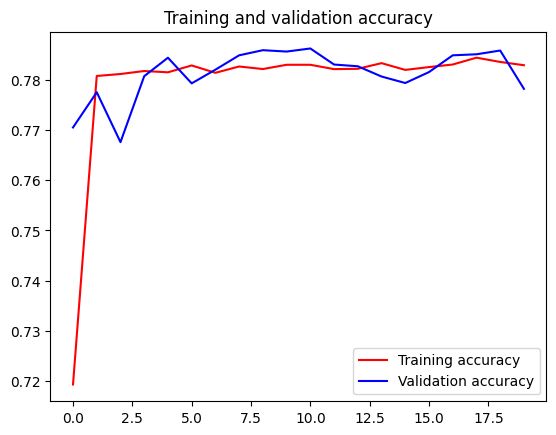

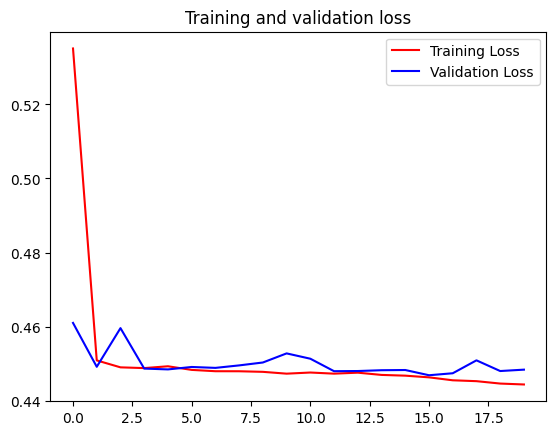

In [34]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()